<a href="https://colab.research.google.com/github/spavithra978/Job-acceptance-prediction/blob/main/Job_acceptance_prediction_system(mini_p_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASE_PATH = "/content/drive/MyDrive/job-acceptance-prediction"


In [ ]:
import os
os.listdir(f"{BASE_PATH}/data/raw")


['job_acceptance.csv']

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

df = pd.read_csv(f"{BASE_PATH}/data/raw/job_acceptance.csv")
df.head()



,age_years,gender,ssc_percentage,hsc_percentage,degree_percentage,degree_specialization,technical_score,aptitude_score,communication_score,skills_match_percentage,certifications_count,internship_experience,years_of_experience,career_switch_willingness,relevant_experience,previous_ctc_lpa,expected_ctc_lpa,company_tier,job_role_match,competition_level,bond_requirement,notice_period_days,layoff_history,employment_gap_months,relocation_willingness,status
0,27,Male,65.061656,83.842578,75.856526,Computer Science,58.221909,89.566305,64.474484,79.548913,2,No,1,Willing,Relevant,3.530557,5.805850,Tier 3,Not Matched,Medium,Not Required,15.0,No,18.0,Not Willing,Not Placed
1,24,Male,67.885626,64.973305,73.093588,Electronics,71.927978,54.591971,61.077306,73.316134,1,yes,0,Not Willing,Relevant,9.858155,10.807739,Tier 1,Matched,High,Required,0.0,NaN,NaN,Not Willing,Not Placed
2,33,Female,73.892471,68.834121,90.196460,Information Technology,72.445041,58.587088,79.494739,75.466980,1,Yes,1,Willing,Relevant,5.801817,5.476839,Tier 3,Not Matched,Low,Not Required,0.0,No,3.0,Not Willing,Placed
3,31,Male,74.145568,76.255126,75.586731,Mechanical,78.855676,61.022065,53.740386,73.676449,2,No,0,Not Willing,Relevant,2.129805,9.980580,Tier 2,Matched,Low,Not Required,0.0,Yes,6.0,NaN,Not Placed
4,28,Male,60.475937,65.786336,80.801010,Information Technology,68.286776,65.713731,61.438314,88.994847,1,No,0,Willing,Not Relevant,7.948314,8.921233,Tier 2,Matched,Medium,Not Required,0.0,No,3.0,Willing,Not Placed


In [ ]:
df.shape


(51500, 26)

In [ ]:
df.columns


Index(['age_years', 'gender', 'ssc_percentage', 'hsc_percentage', 'degree_percentage', 'degree_specialization', 'technical_score', 'aptitude_score', 'communication_score', 'skills_match_percentage',
       'certifications_count', 'internship_experience', 'years_of_experience', 'career_switch_willingness', 'relevant_experience', 'previous_ctc_lpa', 'expected_ctc_lpa', 'company_tier',
       'job_role_match', 'competition_level', 'bond_requirement', 'notice_period_days', 'layoff_history', 'employment_gap_months', 'relocation_willingness', 'status'],
      dtype='object')

In [ ]:
df.dtypes


,0
age_years,int64
gender,object
ssc_percentage,float64
hsc_percentage,float64
degree_percentage,float64
degree_specialization,object
technical_score,float64
aptitude_score,float64
communication_score,float64
skills_match_percentage,float64


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51500 entries, 0 to 51499
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_years                  51500 non-null  int64  
 1   gender                     51500 non-null  object 
 2   ssc_percentage             48919 non-null  float64
 3   hsc_percentage             49435 non-null  float64
 4   degree_percentage          51500 non-null  float64
 5   degree_specialization      51500 non-null  object 
 6   technical_score            51500 non-null  float64
 7   aptitude_score             51500 non-null  float64
 8   communication_score        51500 non-null  float64
 9   skills_match_percentage    51500 non-null  float64
 10  certifications_count       51500 non-null  int64  
 11  internship_experience      51500 non-null  object 
 12  years_of_experience        51500 non-null  int64  
 13  career_switch_willingness  43034 non-null  obj

In [ ]:
#----------DATA CLEANING-------

#----------Identifying the missing values--------

missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


,0
relocation_willingness,8475
layoff_history,8467
career_switch_willingness,8466
relevant_experience,8426
job_role_match,6131
ssc_percentage,2581
hsc_percentage,2065
notice_period_days,1582
employment_gap_months,1097


In [ ]:
num_median_cols = [
    'ssc_percentage',
    'hsc_percentage',
    'notice_period_days',
    'employment_gap_months'
]

for col in num_median_cols:
    df[col] = df[col].fillna(df[col].median())


In [ ]:
#----- Clean categorial column-------

cat_unknown_cols = [
    'career_switch_willingness',
    'relevant_experience',
    'job_role_match',
    'layoff_history',
    'relocation_willingness'
]

for col in cat_unknown_cols:
    df[col] = df[col].fillna('Unknown')



In [ ]:
df.isnull().sum()

,0
age_years,0
gender,0
ssc_percentage,0
hsc_percentage,0
degree_percentage,0
degree_specialization,0
technical_score,0
aptitude_score,0
communication_score,0
skills_match_percentage,0


In [ ]:
#------Fix inconsistent categorial value---------

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].str.strip().str.title()


In [ ]:
import os

os.makedirs(f"{BASE_PATH}/data/processed", exist_ok=True)




In [ ]:
df.to_csv(
    f"{BASE_PATH}/data/processed/cleaned_job_acceptance.csv",
    index=False
)


In [ ]:
os.listdir(f"{BASE_PATH}/data/processed")


['cleaned_job_acceptance.csv']

In [ ]:
# final missing value check
df.isnull().sum().sort_values(ascending=False)


,0
age_years,0
gender,0
ssc_percentage,0
hsc_percentage,0
degree_percentage,0
degree_specialization,0
technical_score,0
aptitude_score,0
communication_score,0
skills_match_percentage,0


In [ ]:
# experience should not be negative
(df['years_of_experience'] < 0).sum()


np.int64(0)

In [ ]:
# percentages should be within 0–100
for col in ['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'skills_match_percentage']:
    print(col, ((df[col] < 0) | (df[col] > 100)).sum())


ssc_percentage 0
hsc_percentage 0
degree_percentage 0
skills_match_percentage 0


Job Acceptance Count:
status
Not Placed    35921
Placed        15579
Name: count, dtype: int64

Job Acceptance Percentage:
status
Not Placed    69.749515
Placed        30.250485
Name: proportion, dtype: float64


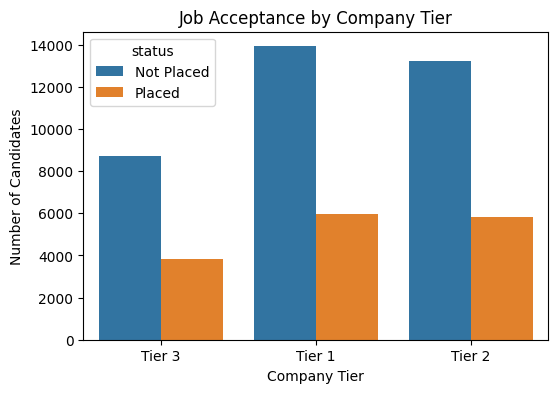

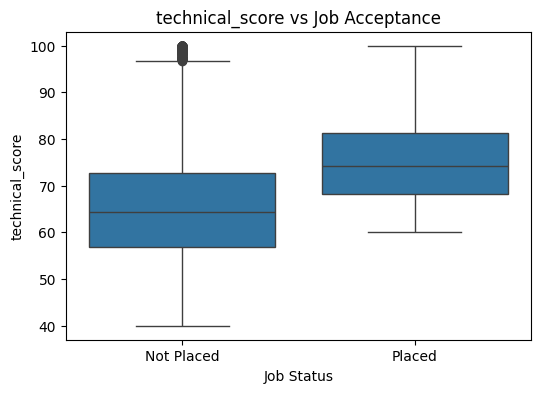

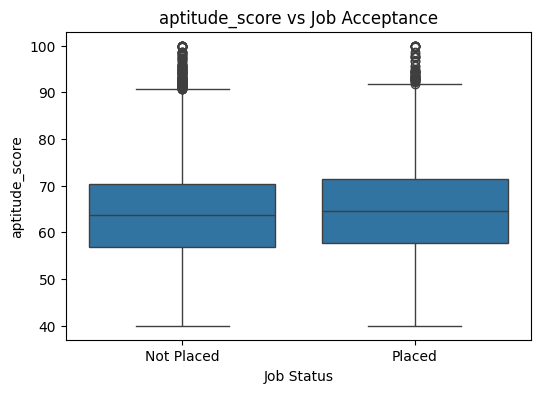

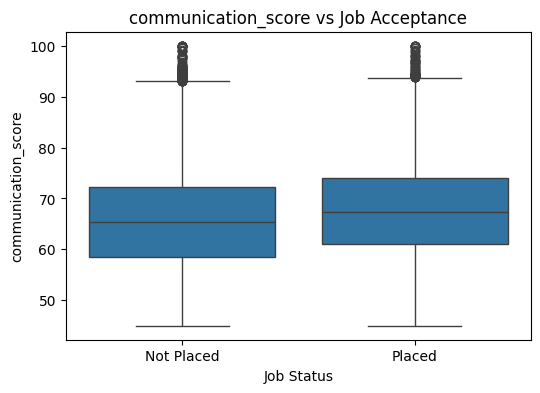

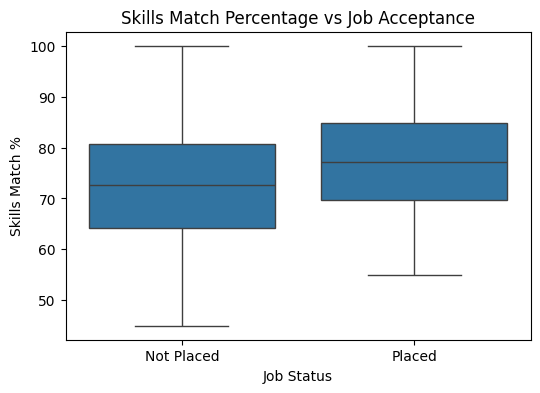

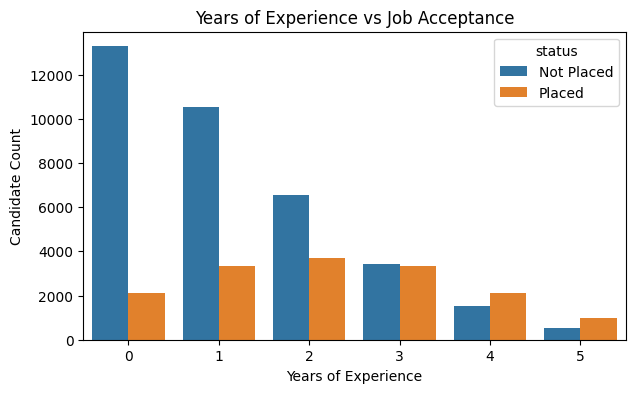

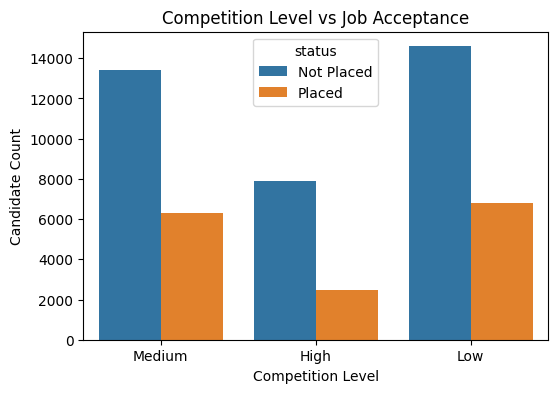

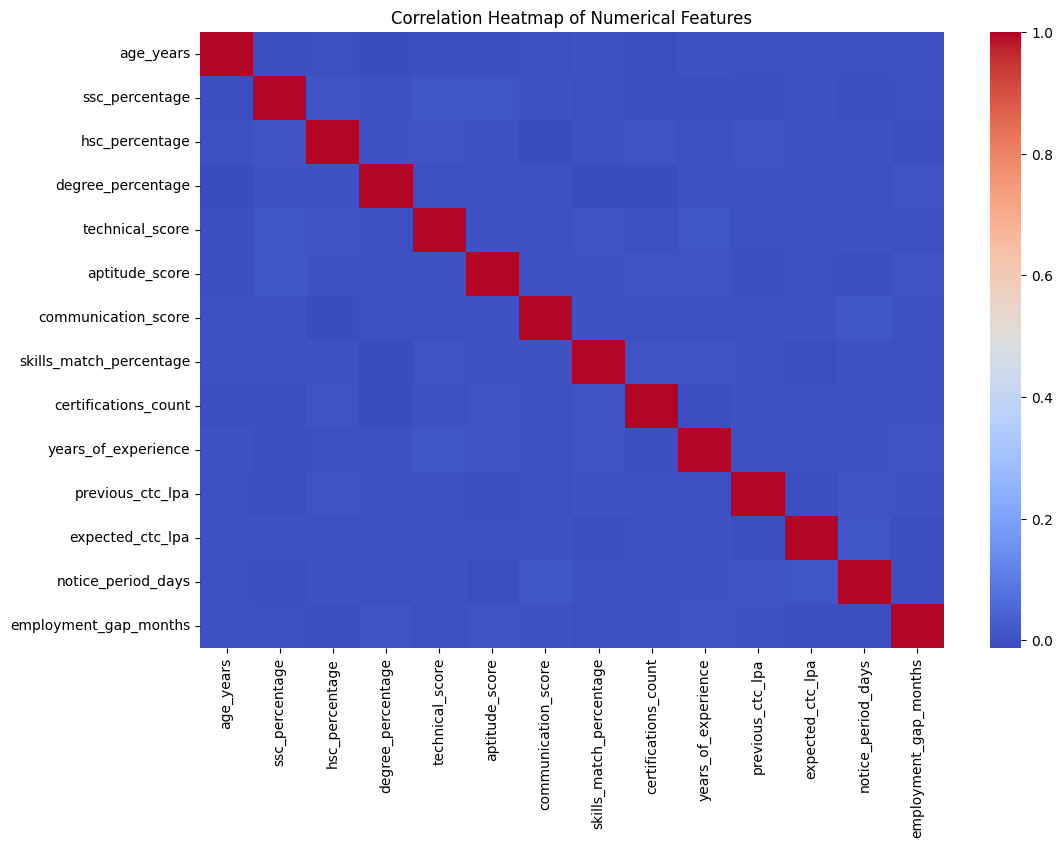

In [ ]:
# ==============================
# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)



# Load CLEANED dataset (never use raw data for EDA)
df = pd.read_csv(f"{BASE_PATH}/data/processed/cleaned_job_acceptance.csv")

# ==============================
# TARGET VARIABLE ANALYSIS
# ==============================

#  Check distribution of job acceptance
print("Job Acceptance Count:")
print(df['status'].value_counts())

print("\nJob Acceptance Percentage:")
print(df['status'].value_counts(normalize=True) * 100)

# ==============================
# COMPANY TIER vs JOB ACCEPTANCE
# ==============================

#  Understand preference across company tiers
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='company_tier', hue='status')
plt.title("Job Acceptance by Company Tier")
plt.xlabel("Company Tier")
plt.ylabel("Number of Candidates")
plt.show()

# ==============================
# INTERVIEW SCORES vs ACCEPTANCE
# ==============================

# Higher interview scores should correlate with acceptance
for col in ['technical_score', 'aptitude_score', 'communication_score']:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='status', y=col)
    plt.title(f"{col} vs Job Acceptance")
    plt.xlabel("Job Status")
    plt.ylabel(col)
    plt.show()

# ==============================
# SKILLS MATCH ANALYSIS
# ==============================

#  Skills match percentage impact on job acceptance
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='status', y='skills_match_percentage')
plt.title("Skills Match Percentage vs Job Acceptance")
plt.xlabel("Job Status")
plt.ylabel("Skills Match %")
plt.show()

# ==============================
# EXPERIENCE vs ACCEPTANCE
# ==============================

#  Analyze experience effect on job acceptance
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='years_of_experience', hue='status')
plt.title("Years of Experience vs Job Acceptance")
plt.xlabel("Years of Experience")
plt.ylabel("Candidate Count")
plt.show()

# ==============================
# COMPETITION LEVEL ANALYSIS
# ==============================

# Market competition impact on acceptance
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='competition_level', hue='status')
plt.title("Competition Level vs Job Acceptance")
plt.xlabel("Competition Level")
plt.ylabel("Candidate Count")
plt.show()

# ==============================
# CORRELATION ANALYSIS (NUMERICAL FEATURES)
# ==============================

# Identify relationships between numerical variables
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(num_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [ ]:
# ==========================================
# STEP 4: FEATURE ENGINEERING
# ==========================================



# NOTE: Load CLEANED dataset
df = pd.read_csv(f"{BASE_PATH}/data/processed/cleaned_job_acceptance.csv")

# ==========================================
# TARGET VARIABLE ENCODING
# ==========================================

# NOTE: Convert target variable to binary
# Placed -> 1 (Accepted), Not Placed -> 0 (Rejected)
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})

# ==========================================
# EXPERIENCE CATEGORY FEATURE
# ==========================================

# NOTE: Group experience into meaningful categories
def experience_category(years):
    if years == 0:
        return 'Fresher'
    elif years <= 3:
        return 'Junior'
    elif years <= 7:
        return 'Mid'
    else:
        return 'Senior'

df['experience_category'] = df['years_of_experience'].apply(experience_category)

# ==========================================
# ACADEMIC PERFORMANCE BAND
# ==========================================

# NOTE: Categorize academic performance for better interpretability
def academic_band(score):
    if score < 60:
        return 'Low'
    elif score < 75:
        return 'Medium'
    else:
        return 'High'

df['degree_performance_band'] = df['degree_percentage'].apply(academic_band)

# ==========================================
# SKILLS MATCH LEVEL
# ==========================================

# NOTE: Convert skills match percentage into levels
def skills_level(score):
    if score < 50:
        return 'Low'
    elif score < 75:
        return 'Medium'
    else:
        return 'High'

df['skills_match_level'] = df['skills_match_percentage'].apply(skills_level)

# ==========================================
# INTERVIEW PERFORMANCE SCORE
# ==========================================

# NOTE: Combine interview-related scores into a single metric
df['interview_total_score'] = (
    df['technical_score'] +
    df['aptitude_score'] +
    df['communication_score']
) / 3

# NOTE: Categorize interview performance
df['interview_performance'] = df['interview_total_score'].apply(
    lambda x: 'Poor' if x < 60 else 'Average' if x < 75 else 'Good'
)

# ==========================================
# CTC EXPECTATION GAP
# ==========================================

# NOTE: Difference between expected and previous CTC
df['ctc_gap'] = df['expected_ctc_lpa'] - df['previous_ctc_lpa']

# NOTE: Flag high expectation mismatch
df['high_ctc_gap'] = df['ctc_gap'].apply(lambda x: 1 if x > 2 else 0)

# ==========================================
# OFFER RISK INDICATOR
# ==========================================

# NOTE: High-risk candidates more likely to reject offers
df['offer_risk'] = np.where(
    (df['high_ctc_gap'] == 1) &
    (df['competition_level'] == 'High') &
    (df['skills_match_percentage'] < 60),
    1, 0
)

# ==========================================
# DROP UNUSED / REDUNDANT COLUMNS
# ==========================================

# NOTE: Remove columns no longer needed for modeling
drop_cols = [
    'technical_score',
    'aptitude_score',
    'communication_score'
]

df.drop(columns=drop_cols, inplace=True)

# ==========================================
# SAVE FEATURE-ENGINEERED DATA
# ==========================================

# NOTE: Save final dataset for modeling
import os
os.makedirs(f"{BASE_PATH}/data/final", exist_ok=True)

df.to_csv(
    f"{BASE_PATH}/data/final/feature_engineered_job_acceptance.csv",
    index=False
)

print("Feature engineering completed successfully!")


Feature engineering completed successfully!


In [ ]:
import os

os.makedirs(f"{BASE_PATH}/models", exist_ok=True)


In [ ]:
# ==========================================
# STEP 5: MACHINE LEARNING MODELING
# ==========================================

# NOTE: Define base project path
BASE_PATH = "/content/drive/MyDrive/job-acceptance-prediction"

# NOTE: Import required libraries
import pandas as pd
import numpy as np
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)

# ==========================================
# LOAD FEATURE-ENGINEERED DATA
# ==========================================

df = pd.read_csv(f"{BASE_PATH}/data/final/feature_engineered_job_acceptance.csv")

# ==========================================
# ENCODE CATEGORICAL FEATURES
# ==========================================

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Save fully encoded dataset (Streamlit will use this)
os.makedirs(f"{BASE_PATH}/data/final", exist_ok=True)

df.to_csv(
    f"{BASE_PATH}/data/final/feature_engineered_encoded.csv",
    index=False
)

print("Encoding completed and saved.")

# ==========================================
# SPLIT FEATURES & TARGET
# ==========================================

X = df.drop('status', axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ==========================================
# MODEL 1: LOGISTIC REGRESSION
# ==========================================

lr_model = LogisticRegression(max_iter=5000)   # increased iterations
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("\nLogistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print("\nLogistic Regression Classification Report:\n",
      classification_report(y_test, y_pred_lr))

# ==========================================
# MODEL 2: RANDOM FOREST
# ==========================================

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:\n",
      classification_report(y_test, y_pred_rf))

# ==========================================
# FEATURE IMPORTANCE
# ==========================================

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nTop 10 Important Features:\n")
print(feature_importance.head(10))

# ==========================================
# SAVE MODEL
# ==========================================

os.makedirs(f"{BASE_PATH}/models", exist_ok=True)

joblib.dump(
    rf_model,
    f"{BASE_PATH}/models/job_acceptance_model.pkl"
)

print("\nModel training and saving completed successfully!")


Encoding completed and saved.

Logistic Regression Accuracy: 0.8307766990291262

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      7184
           1       0.75      0.67      0.70      3116

    accuracy                           0.83     10300
   macro avg       0.80      0.78      0.79     10300
weighted avg       0.83      0.83      0.83     10300


Random Forest Accuracy: 0.8359223300970874

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      7184
           1       0.80      0.61      0.69      3116

    accuracy                           0.84     10300
   macro avg       0.82      0.77      0.79     10300
weighted avg       0.83      0.84      0.83     10300


Top 10 Important Features:

interview_total_score      0.192817
years_of_experience        0.164204
skills_match_percentage    0.092658
e

In [ ]:
import joblib

joblib.dump(
    rf_model,
    f"{BASE_PATH}/models/job_acceptance_model.pkl"
)


['/content/drive/MyDrive/job-acceptance-prediction/models/job_acceptance_model.pkl']

In [ ]:
os.listdir(f"{BASE_PATH}/models")


['job_acceptance_model.pkl']

In [ ]:
df.dtypes


,0
age_years,int64
gender,int64
ssc_percentage,float64
hsc_percentage,float64
degree_percentage,float64
degree_specialization,int64
skills_match_percentage,float64
certifications_count,int64
internship_experience,int64
years_of_experience,int64
